In [2]:
import cv2
import math

In [3]:
#origin area
origin_sz=[16,16]
#area scale
scale_s=[0.5,1,2]
#ratio of width and height
ratio_s=[0.5,1,2]
print(origin_sz)
print(math.sqrt(100))

[16, 16]
10.0


In [117]:
#generate the anchor of point(x,y)
def generate_anchor(point,origin_sz,scale_s,ratio_s):
    #point:center point:(x,y)
    #origin_sz:the original area of the stardard(w,h) 
    #scale_s:area ratio 
    #ratio_s:the ratio of width and height
    anchor_list=[]
    
    for i in range(len(scale_s)):
        temp_area = origin_sz[0]*origin_sz[1]*scale_s[i]**2
        #print(temp_area)
        for j in range(len(ratio_s)):     
            temp_w = math.sqrt(temp_area/ratio_s[j])
            temp_h = temp_w*ratio_s[j]
            #print([point[0],point[1],int(temp_w),int(temp_h)])
            anchor_list.append([point[0],point[1],int(temp_w),int(temp_h)])
            
    
   # print(anchor_list)
    return anchor_list


In [96]:
point=[16,16]
origin_sz=[16,16]
scale_s=[8,16,32]
ratio_s=[0.5,1,2]
generate_anchor(point,origin_sz,scale_s,ratio_s)

[[16, 16, 64, 32],
 [16, 16, 45, 45],
 [16, 16, 32, 64],
 [16, 16, 90, 45],
 [16, 16, 64, 64],
 [16, 16, 45, 90],
 [16, 16, 128, 64],
 [16, 16, 90, 90],
 [16, 16, 64, 128]]

In [4]:
image_data = cv2.imread('trump.jpg')
print(image_data.shape)

(583, 875, 3)


In [5]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image_data,cv2.COLOR_BGR2RGB))
plt.show()

<Figure size 640x480 with 1 Axes>

(583, 875, 3)
(583, 875, 3)


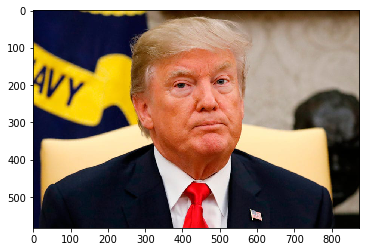

In [124]:
#add the anchor to image
import torch
import matplotlib.pyplot as plt

#image_draw =cv2.resize(image_data,(100,100))
image_draw = image_data.copy()
n_pad=0
#image_draw = cv2.copyMakeBorder(image_data, n_pad, n_pad, n_pad, n_pad, cv2.BORDER_CONSTANT, value=0)#top,bottom,left,right

print(image_data.shape)
print(image_draw.shape)
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()

[-90, -45, 90, 45, 181, 90]
(0, 255, 0)
[-64, -64, 64, 64, 128, 128]
(0, 255, 0)
[-45, -90, 45, 90, 90, 181]
(0, 255, 0)
[-181, -90, 181, 90, 362, 181]
(255, 0, 0)
[-128, -128, 128, 128, 256, 256]
(255, 0, 0)
[-90, -181, 90, 181, 181, 362]
(255, 0, 0)
[-362, -181, 362, 181, 724, 362]
(0, 0, 255)
[-256, -256, 256, 256, 512, 512]
(0, 0, 255)
[-181, -362, 181, 362, 362, 724]
(0, 0, 255)
[210, 355, 390, 445, 181, 90]
(0, 255, 0)
[236, 336, 364, 464, 128, 128]
(0, 255, 0)
[255, 310, 345, 490, 90, 181]
(0, 255, 0)
[119, 310, 481, 490, 362, 181]
(255, 0, 0)
[172, 272, 428, 528, 256, 256]
(255, 0, 0)
[210, 219, 390, 581, 181, 362]
(255, 0, 0)
[-62, 219, 662, 581, 724, 362]
(0, 0, 255)
[44, 144, 556, 656, 512, 512]
(0, 0, 255)
[119, 38, 481, 762, 362, 724]
(0, 0, 255)
[710, 455, 890, 545, 181, 90]
(0, 255, 0)
[736, 436, 864, 564, 128, 128]
(0, 255, 0)
[755, 410, 845, 590, 90, 181]
(0, 255, 0)
[619, 410, 981, 590, 362, 181]
(255, 0, 0)
[672, 372, 928, 628, 256, 256]
(255, 0, 0)
[710, 319, 890, 6

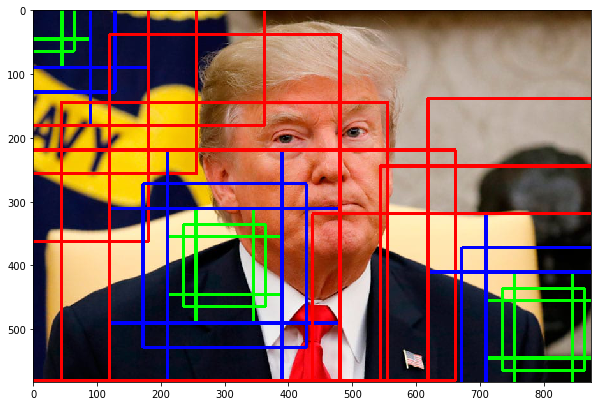

In [125]:
point_center=[[0,0],[300,400],[800,500]]
point=[0,0]
origin_sz=[16,16]
scale_s=[8,16,32]
ratio_s=[0.5,1,2]
anchors = generate_anchor(point,origin_sz,scale_s,ratio_s)
colors=[(0,255,0),(255,0,0),(0,0,255)]
for i in range(len(point_center)):
    for j in range(len(anchors)):
        #print(anchors[j][0])
        #print(anchors[j][2]/2)
        #print(point_center[0])
        x1 = anchors[j][0] - int(anchors[j][2]/2) + point_center[i][0]+n_pad
        y1 = anchors[j][1] - int(anchors[j][3]/2)+ point_center[i][1]+n_pad
        x2 = anchors[j][0] + int(anchors[j][2]/2)+ point_center[i][0]+n_pad
        y2 = anchors[j][1] + int(anchors[j][3]/2)+ point_center[i][1]+n_pad
        print([x1,y1,x2,y2,anchors[j][2],anchors[j][3]])
        print(colors[int(j/3)])
        cv2.rectangle(image_draw,(int(x1),int(y1)),(int(x2),int(y2)),colors[int(j/3)],3)
plt.figure(figsize= (10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
#generate the anchor of point(x,y)
def generate_anchor_final(point,origin_sz,scale_s,ratio_s):
    #point:center point:(x,y)
    #origin_sz:the original area of the stardard(w,h) 
    #scale_s:area ratio 
    #ratio_s:the ratio of width and height
    anchor_list=[]
    
    for i in range(len(scale_s)):
        temp_area = origin_sz[0]*origin_sz[1]#*scale_s[i]**2
        print(temp_area)
        #print(temp_area)
        for j in range(len(ratio_s)):     
            temp_w = round(math.sqrt(temp_area/ratio_s[j]))
            temp_h = round(temp_w*ratio_s[j])
            #print([temp_w,temp_h])
            temp_w = round(temp_w)*scale_s[i]
            temp_h = round(temp_h)*scale_s[i]
            #print([point[0],point[1],int(temp_w),int(temp_h)])
            
            x1 = round((origin_sz[0]-1)/2 - (temp_w-1)/2)+1
            y1 = round((origin_sz[1]-1)/2 - (temp_h-1)/2)+1
            x2 = round((origin_sz[0]-1)/2 + (temp_w-1)/2)+1
            y2 = round((origin_sz[0]-1)/2 + (temp_h-1)/2)+1
            print([x1,y1,x2,y2,temp_w,temp_h])
            anchor_list.append([point[0],point[1],int(temp_w),int(temp_h)])
            
    
   # print(anchor_list)
    return anchor_list
point=[0,0]
origin_sz=[16,16]
scale_s=[8,16,32]
ratio_s=[0.5,1,2]
anchors = generate_anchor_final(point,origin_sz,scale_s,ratio_s)

256
[-83, -39, 100, 56, 184, 96]
[-55, -55, 72, 72, 128, 128]
[-35, -79, 52, 96, 88, 176]
256
[-175, -87, 192, 104, 368, 192]
[-119, -119, 136, 136, 256, 256]
[-79, -167, 96, 184, 176, 352]
256
[-359, -183, 376, 200, 736, 384]
[-247, -247, 264, 264, 512, 512]
[-167, -343, 184, 360, 352, 704]


In [10]:
point_center=[[0,0],[300,400],[800,500]]
point=[0,0]
origin_sz=[16,16]
scale_s=[8,16,32]
ratio_s=[0.5,1,2]
anchors = generate_anchor_final(point,origin_sz,scale_s,ratio_s)
n_pad =0
colors=[(0,255,0),(255,0,0),(0,0,255)]
for i in range(len(point_center)):
    for j in range(len(anchors)):
        #print(anchors[j][0])
        #print(anchors[j][2]/2)
        #print(point_center[0])
        x1 = anchors[j][0] - int(anchors[j][2]/2) + point_center[i][0]+n_pad
        y1 = anchors[j][1] - int(anchors[j][3]/2)+ point_center[i][1]+n_pad
        x2 = anchors[j][0] + int(anchors[j][2]/2)+ point_center[i][0]+n_pad
        y2 = anchors[j][1] + int(anchors[j][3]/2)+ point_center[i][1]+n_pad
        print([x1,y1,x2,y2,anchors[j][2],anchors[j][3]])
        print(colors[int(j/3)])
        cv2.rectangle(image_draw,(int(x1),int(y1)),(int(x2),int(y2)),colors[int(j/3)],3)
plt.figure(figsize= (10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()

256
[-83, -39, 100, 56, 184, 96]
[-55, -55, 72, 72, 128, 128]
[-35, -79, 52, 96, 88, 176]
256
[-175, -87, 192, 104, 368, 192]
[-119, -119, 136, 136, 256, 256]
[-79, -167, 96, 184, 176, 352]
256
[-359, -183, 376, 200, 736, 384]
[-247, -247, 264, 264, 512, 512]
[-167, -343, 184, 360, 352, 704]
[-92, -48, 92, 48, 184, 96]
(0, 255, 0)


NameError: name 'image_draw' is not defined